In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [40]:
cimage = cv2.imread('chess.png')

In [2]:
image = cv2.imread('chess.png',0)

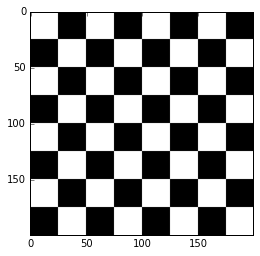

In [4]:
plt.imshow(image,"gray")
plt.show()

In [7]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges  or  Canny(dx, dy, threshold1, threshold2[, edges[, L2gradient]]) -> edges



In [21]:
canny_img = cv2.Canny(image,50,100,apertureSize=3)

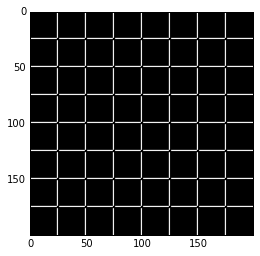

In [29]:
plt.imshow(canny_img,"gray")
plt.show()

In [22]:
help(cv2.HoughLines)

Help on built-in function HoughLines:

HoughLines(...)
    HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) -> lines



In [34]:
lines = cv2.HoughLines(canny_img,1,np.pi/180,100)
lines.shape

(14, 1, 2)

In [36]:
type(lines)
print(lines[0].shape)

(1, 2)


In [42]:
for i in range(lines.shape[0]):
    for rho,theta in lines[i]:
        cos = np.cos(theta)
        sin = np.sin(theta)
        x0 = rho*cos
        y0 = rho*sin
        x1 = int(x0 + 1000*(-sin))
        y1 = int(y0 + 1000*(cos))
        x2 = int(x0 - 1000*(-sin))
        y2 = int(y0 - 1000*(cos))
        line = cv2.line(cimage,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imwrite("houghlines.jpg",cimage)

In [100]:
cimage = cv2.imread("opencv-logo2.png")

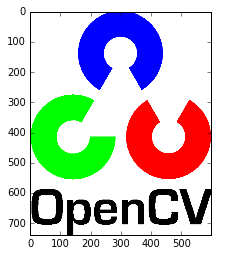

In [101]:
plt.imshow(cimage)
plt.show()

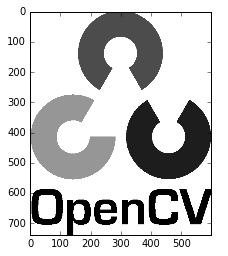

In [102]:
image = cv2.cvtColor(cimage,cv2.COLOR_BGR2GRAY)
plt.imshow(image,"gray")
plt.show()

In [103]:
denoised = cv2.medianBlur(image,5)

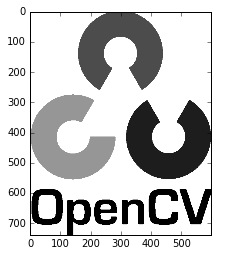

In [104]:
plt.imshow(denoised,"gray")
plt.show()

In [105]:
hough_circles = cv2.HoughCircles(denoised,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

In [106]:
hough_circles=np.uint16(np.around(hough_circles))

In [107]:
hough_circles.shape

(1, 20, 3)

In [108]:
hough_circles

array([[[458, 422,  47],
        [136, 420, 133],
        [160, 674,  18],
        [300, 140,  58],
        [ 48, 646,  38],
        [168, 650,  31],
        [240, 650,  29],
        [438, 656,  51],
        [250, 670,  20],
        [160, 414,  74],
        [456, 672,  32],
        [ 68, 646,  43],
        [464, 402, 154],
        [154, 436, 116],
        [456, 646,  51],
        [440, 406, 122],
        [438, 634,  51],
        [262, 644,  23],
        [ 36, 672,  31],
        [348, 656,  35]]], dtype=uint16)

In [109]:
help(cv2.circle)

Help on built-in function circle:

circle(...)
    circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img



In [110]:
hough_circles[0][0]

array([458, 422,  47], dtype=uint16)

In [111]:
count = hough_circles.shape[1]
for i in range(count):
    cv2.circle(cimage,(hough_circles[0][i][0],hough_circles[0][i][1]),hough_circles[0][i][2],(0,255,0),2)


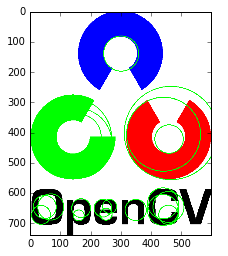

In [112]:
plt.imshow(cimage)
plt.show()